In [1]:
import pickle, os, torch
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import r2_score

In [76]:
from matplotlib.ticker import NullFormatter
from scipy import stats
from matplotlib.ticker import NullFormatter
from scipy import stats

def plot(ys, pred):
#     target=r"log($SFR/M_{\odot}/yr$)"
    target=r"log($M_{cold}/M_{\odot}$)"
    # target=r"$v_{disk}$"

    nullfmt = NullFormatter()         # no labels

    # definitions for the axes
    left, width = 0.1, 0.7
    bottom, height = 0.1, 0.7
    bottom_h = left_h = left + width
    # rect_Cbar = [0, bottom, 0.1, height]
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom_h, width, 0.15]
    rect_histy = [left_h, bottom, 0.15+0.06, height]

    # start with a rectangular Figure
    plt.figure(1, figsize=(7, 7))
    # axCbar = plt.axes(rect_Cbar)
    axHist = plt.axes(rect_scatter)
    axHistx = plt.axes(rect_histx)
    axHisty = plt.axes(rect_histy)

    # no labels
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)
    axHistx.yaxis.set_major_formatter(nullfmt)
    axHisty.xaxis.set_major_formatter(nullfmt)

    bins=50
    l=0.0
    n_contour=4
    # the scatter plot:
    vals, x, y, hist =axHist.hist2d( ys, pred,bins=bins, range=[np.percentile(np.hstack([ys,pred]), [0+l,100-l]),
                                np.percentile(np.hstack([ys,pred]), [0+l,100-l])], norm=mpl.colors.LogNorm(), cmap=mpl.cm.viridis)
    X, Y = np.meshgrid((x[1:]+x[:-1])/2, (y[1:]+y[:-1])/2)
    axHist.contour(X,Y, np.log(vals.T+1), levels=n_contour, colors='white')
    axHist.plot([min(ys),max(ys)],[min(ys),max(ys)], 'k--', label='Perfect correspondance')
    axHist.set(xlabel=f'SAM {target}',ylabel=f'GNN {target}')
    axHist.legend()

    X, Y = X[0], Y.T[0]
    axHist.set_xlim((min(X), max(X)))
    axHist.set_ylim((min(Y), max(Y)))
    yhat=r'$\hat{y}$'
    
    #calculate metrics
    pct=np.sum(np.abs(ys-pred)<0.2)/len(ys-pred)    
    r2=r2_score(ys,pred)
    rho = np.corrcoef(ys,pred)[0,1]
    
    xt=0.6
    yt=0.3
    dy=0.05
    font = {'weight': 'normal',
        'size': 14}
    
    axHist.text(xt,yt, f'Bias : {np.mean(ys-pred):.3f} dex', fontdict=font, transform=axHist.transAxes)
    axHist.text(xt,yt-dy, r'$\sigma$ : '+f'{np.std(ys-pred):.3f} dex', fontdict=font, transform=axHist.transAxes)
    axHist.text(xt,yt-2*dy, r'Pearson:  '+f'{rho:.3f}', fontdict=font, transform=axHist.transAxes)
    axHist.text(xt,yt-3*dy, r'$R^2$:  '+f'{r2:.3f}', fontdict=font, transform=axHist.transAxes)

    axHist.text(xt,yt-4*dy, '% < 0.2 dex:  '+f'{pct*100:.1f}', fontdict=font, transform=axHist.transAxes)


    # axHistx.hist(ys[:,n], bins=bins, histtype='step', density=1)
    # axy=axHisty.hist(pred[:,n], bins=bins, histtype='step', density=1, orientation='horizontal')
    ys_kde = stats.gaussian_kde(ys, 0.1)
    pred_kde = stats.gaussian_kde(pred, 0.1)
    axHistx.plot(X, ys_kde(X), 'k--', label=f'SAM')
    axHisty.plot(pred_kde(Y), Y, "k-.", label=f'GNN')
    axHistx.legend()
    axHisty.legend(loc='upper left')

    axHistx.set(title=f'SAM-GNN {target} relationship')

    axHistx.set_xlim(axHist.get_xlim())
    axHisty.set_ylim(axHist.get_ylim())

    plt.colorbar(hist, ax=axHisty, location='right')

    plt.show()

In [77]:
# this is the uncorrelated run
folder = 'results_sweep_others_220122'
run='Sage_vlarge_all_4t_z0.0_quantile_raw_pabcnh'
pointer=osp.expanduser(f'~/../../scratch/gpfs/cj1223/GraphResults/{folder}/{run}')    

In [78]:
results=pickle.load(open(osp.join(pointer,'result_dict.pkl'), 'rb'))
config=pickle.load(open(osp.join(pointer,'construct_dict.pkl'), 'rb'))

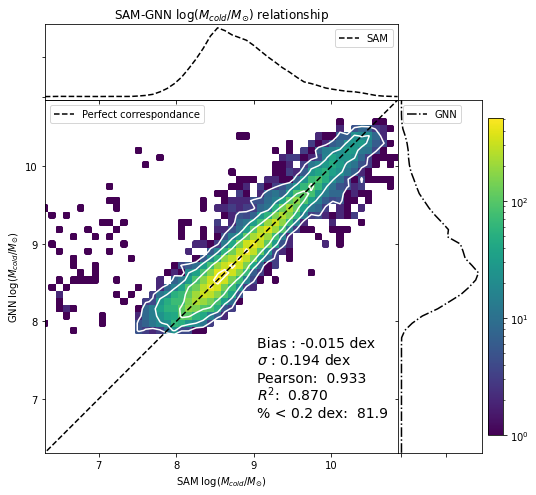

In [79]:
pointer=osp.expanduser(f'~/../../scratch/gpfs/cj1223/GraphResults/{folder}/{run}') 
plot(ys.flatten(), pred.flatten())

In [9]:
# this is the correlated run
folder = 'results_sweep_multi_220122'
run='Sage_vlarge_all_4t_z0.0_quantile_raw_vrglnf'
run='Sage_vlarge_all_4t_z0.0_quantile_raw_xcmcgt'

In [10]:
pointer=osp.expanduser(f'~/../../scratch/gpfs/cj1223/GraphResults/{folder}/{run}')    

In [11]:
os.listdir(pointer)

['performance_ne500_m_cold.png',
 'performance_ne500_v_disk.png',
 'events.out.tfevents.1642901764.tiger-i22g12.526.4',
 'construct_dict.pkl',
 'trained_model',
 'result_dict.pkl',
 'Sage_vlarge_all_4t_z0.0_quantile_raw_xcmcgt']

In [12]:
results=pickle.load(open(osp.join(pointer,'result_dict.pkl'), 'rb'))
config=pickle.load(open(osp.join(pointer,'construct_dict.pkl'), 'rb'))

In [13]:
n=1
ys, pred, targets = results['low_ys'][:,n]+9, results['low_pred'][:,n]+9, config["data_params"]['targets']

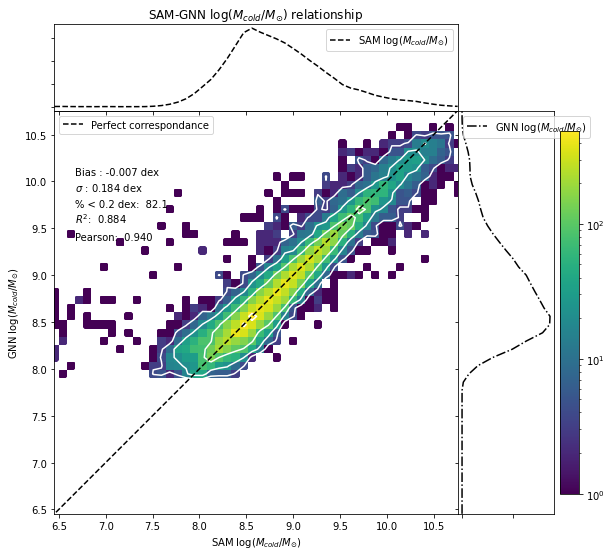

In [14]:
plot(ys.flatten(), pred.flatten())